In [184]:
import pandas as pd

In [185]:
data = pd.read_csv("Questionnaire_Updated.csv")

In [186]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps_2018,"""Ja, ich habe die Hinweise zum Datenschutz (si...","wissenschaftssystem, betreuung, wissenschaft..."
1,document2,WeGe_W2,"""Ich habe die Informationen zum Datenschutz ge...","integration, geflüchtete, studienkolleg, mi..."
2,document3,StuMa2020,""" Wenn Sie an Ihr letztes Studium\n\t\t\t\t\t\...","beruflicher verbleib von exmatrikulierten, st..."
3,document4,Studierdenensurvey2016,""" An welcher Art Hochschule\n\t\t\t\t\t\tstudi...","evaluation, qualifikation, effizienz, studi..."
4,document5,Absolventen_20092_Haupt,"""Welche der folgenden Tätigkeiten\n\t\t\t\t\t\...",hochschulforschung
5,document6,Promopanel_W4,"""Waren oder sind Sie\n\t\t\t\t\t\tseit der let...","promotion, hochschulforschung"
6,document7,Studienberechtigte_2008.3,Ich willige in die Teilnahme an der Befragung ...,"studienberechtigte, hochschulforschung"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache\n\t\t\t\t\t\tmöchten Sie d...",hochschulforschung
8,document9,Promopanel_W3,"""Ich willige in die Teilnahme an der Befragung...","promotion, hochschulforschung"
9,document10,Sozialerhebung20,Welches Hauptfach bzw. welche\n\t\t\t\t\t\tFäc...,hochschulforschung


In [187]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

# stemmer = SnowballStemmer("german")

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [188]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
877


In [189]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
#     if for_embedding:
        # Keep punctuation
#         RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
#         RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [190]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [191]:
data["clean_text"][0]

'Ja ich habe die Hinweise zum Datenschutz siehe Link weiter oben gelesen und bin damit einverstanden Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert In der Zwischenzeit kann sich daran etwas geändert haben Bitte geben Sie an was aktuell auf Sie zutrifft Aus welchen Gründen haben Sie das Promotionsvorhaben unterbrochen Aus welchen Gründen haben Sie das Promotionsvorhaben abgebrochen Handelt es sich um eine offiziell der Hochschule gemeldete Unterbrechung Warum haben Sie die Promotion begonnen Weil mich die Fragestellung interess

In [192]:
data["clean_text_wo_sw"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [193]:
data["clean_text_wo_sw"][0]

'hinweise datenschutz siehe link gelesen einverstanden hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren doppelbefragungen vermeiden innerhalb fragebogens angegebenen antworten hochschule zweck qualitätssicherung evaluation bereich doktorandenausbildung einverständnis vorausgesetzt anfang dezember hochschule offiziell doktorand registriert zwischenzeit geändert aktuell zutrifft gründen promotionsvorhaben unterbrochen gründen promotionsvorhaben abgebrochen handelt offiziell hochschule gemeldete unterbrechung promotion begonnen fragestellung interessiert wissenschaftlichen fortschritt beitragen fach üblich persönliches umfeld erwartet ergeben dauerhaft wissenschaftlich arbeiten lösung dringender gesellschaftlicher probleme beitragen ansehen steigern berufschancen außerakademischen arbeitsmarkt verbessern sonstiges inhaltlichen arbeit promotion begonnen erinnern quartal arbeiten begonnen erinnern quartal arbeiten begonnen hochschul

In [194]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [195]:
#using spacy model for POS tagging

Extracted_Noun=[]  # can change it to Extracted_Noun
for i in range(len(data["clean_text"])):
    Extracted_Noun.append([])
    doc = nlp(data["clean_text"][i])
    for t in doc:
        tag=t.pos_
        if tag =="NOUN": # for Noun, only "NOUN"
            if t.text not in Extracted_Noun:
                Extracted_Noun[i].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [196]:
Extracted_Noun[1]

[('Informationen', 'NOUN'),
 ('Datenschutz', 'NOUN'),
 ('willige', 'NOUN'),
 ('Teilnahme', 'NOUN'),
 ('Befragung', 'NOUN'),
 ('Verwendung', 'NOUN'),
 ('Daten', 'NOUN'),
 ('Zeit', 'NOUN'),
 ('Laune', 'NOUN'),
 ('Aufwachen', 'NOUN'),
 ('Alltag', 'NOUN'),
 ('Dinge', 'NOUN'),
 ('Screen', 'NOUN'),
 ('Aussagen', 'NOUN'),
 ('Pfeiltaste', 'NOUN'),
 ('Kurs', 'NOUN'),
 ('Kurs', 'NOUN'),
 ('Kurs', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Hochschulzugang', 'NOUN'),
 ('Feststellungsprüfung', 'NOUN'),
 ('Studienkollegs', 'NOUN'),
 ('Kurs', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Hochschulzugang', 'NOUN'),
 ('Feststellungsprüfung', 'NOUN'),
 ('Kurs', 'NOUN'),
 ('Befragung', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Feststellungsprüfung', 'NOUN'),
 ('inkl', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Deutsch', 'NOUN'),
 ('Feststellungsprüfung', 'NOUN'),
 ('Sprachprüfung', 'NOUN'),
 ('Deutsch', 'NOUN'),
 ('Befreiung', 'NOUN'),
 ('Prüfung', 'NOUN'),
 ('Frage', 'NOUN'),
 ('Sprachprüf

In [314]:
#lemmatization on POS tagged text using GermaLemma

from germalemma import GermaLemma

lemmatizer = GermaLemma()

lemmatized_words = []
for i in range(len(Extracted_Noun)):  #can change it to Extracted_Noun
    lemmatized_words.append([])
    for j in range(len(Extracted_Noun[i])): 
            lemmatized_words[i].append(lemmatizer.find_lemma(Extracted_Noun[i][j][0], Extracted_Noun[i][j][1]))

In [198]:
lemmatized_words[0]

['Hinweis',
 'Datenschutz',
 'Link',
 'Hochschule',
 'Dezember',
 'Promotion',
 'Interesse',
 'Promotionsbedingung',
 'Promovierenden',
 'Doppelbefragung',
 'Fragebogen',
 'Antwort',
 'Hochschule',
 'Zweck',
 'Qualitätssicherung',
 'Evaluation',
 'Bereich',
 'Doktorandenausbildung',
 'Einverständnis',
 'Anfang',
 'Dezember',
 'Hochschule',
 'Doktorand',
 'Zwischenzeit',
 'Bitte',
 'Grund',
 'Promotionsvorhaben',
 'Grund',
 'Promotionsvorhaben',
 'Hochschule',
 'Unterbrechung',
 'Promotion',
 'Fragestellung',
 'Fortschritt',
 'Fach',
 'Umfeld',
 'Anderes',
 'Lösung',
 'Problem',
 'Ansehen',
 'Berufschance',
 'Arbeitsmarkt',
 'Sonstige',
 'Arbeit',
 'Promotion',
 'Quartal',
 'Arbeit',
 'Quartal',
 'Arbeit',
 'Hochschule',
 'Promotion',
 'Zulassungsantrag',
 'Quartal',
 'Promotion',
 'Hochschule',
 'Promotion',
 'Promotion',
 'Quartal',
 'Promotion',
 'Hochschule',
 'Hochschule',
 'Hochschule',
 'Promotion',
 'Hochschule',
 'Standort',
 'Forschungsbedingung',
 'Fach',
 'Betreuers',
 'Betr

In [199]:
# converting the list of tokens into string
lemmatized_corpus = [' '.join(x) for x in lemmatized_words]
print(lemmatized_corpus[0]) 

Hinweis Datenschutz Link Hochschule Dezember Promotion Interesse Promotionsbedingung Promovierenden Doppelbefragung Fragebogen Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis Anfang Dezember Hochschule Doktorand Zwischenzeit Bitte Grund Promotionsvorhaben Grund Promotionsvorhaben Hochschule Unterbrechung Promotion Fragestellung Fortschritt Fach Umfeld Anderes Lösung Problem Ansehen Berufschance Arbeitsmarkt Sonstige Arbeit Promotion Quartal Arbeit Quartal Arbeit Hochschule Promotion Zulassungsantrag Quartal Promotion Hochschule Promotion Promotion Quartal Promotion Hochschule Hochschule Hochschule Promotion Hochschule Standort Forschungsbedingung Fach Betreuers Betreuerin Rufs Hochschule Serviceangebot Promovierende Sonstige Promotionsverfahren Hochschule Ausland Abschluss Hochschule In Ausland Promotionsverfahren Fachhochschule Hochschule Wissenschaft Promotionsverfahren Fachhochschule Hochschule Wissenschaft Verwaltungshochschule Au

In [200]:
#adding column to the dataframe

data['clean_text_w_lemma']= lemmatized_corpus

In [201]:
data['clean_text_w_lemma'][0]

'Hinweis Datenschutz Link Hochschule Dezember Promotion Interesse Promotionsbedingung Promovierenden Doppelbefragung Fragebogen Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis Anfang Dezember Hochschule Doktorand Zwischenzeit Bitte Grund Promotionsvorhaben Grund Promotionsvorhaben Hochschule Unterbrechung Promotion Fragestellung Fortschritt Fach Umfeld Anderes Lösung Problem Ansehen Berufschance Arbeitsmarkt Sonstige Arbeit Promotion Quartal Arbeit Quartal Arbeit Hochschule Promotion Zulassungsantrag Quartal Promotion Hochschule Promotion Promotion Quartal Promotion Hochschule Hochschule Hochschule Promotion Hochschule Standort Forschungsbedingung Fach Betreuers Betreuerin Rufs Hochschule Serviceangebot Promovierende Sonstige Promotionsverfahren Hochschule Ausland Abschluss Hochschule In Ausland Promotionsverfahren Fachhochschule Hochschule Wissenschaft Promotionsverfahren Fachhochschule Hochschule Wissenschaft Verwaltungshochschule A

In [202]:
# #Lemmatization on the corpus text which contains all the stopwords.

#not a good lemmatizer as the accuracy of the model for lemmatization is 73%

# clean_text_w_lemma_w_sw = []  # clean text with lemmatization

# for words in data["clean_text"]:
#      doc = nlp(words)
#      result = ' '.join([token.lemma_ for token in doc]) 
#      clean_text_w_lemma_w_sw.append(result)

In [203]:
sample_data = (data['clean_text']).tolist()

In [204]:
sample_data_wo_sw = (data['clean_text_wo_sw']).tolist()

In [205]:
sample_data_w_lemma= (data['clean_text_w_lemma']).tolist()

In [206]:
new_df =data["clean_text_w_lemma"].str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

,Word,Frequency
0,Tätigkeit,460
1,Studium,386
2,Promotion,280
3,Hochschule,211
4,Grund,171
...,...,...
3061,Herausgeberin,1
3062,Vollzeitstudent,1
3063,Acknowledgments,1
3064,Manuskriptbegutachtung,1


In [207]:
len(new_df)

3066

In [208]:
new_df[0:5]

,Word,Frequency
0,Tätigkeit,460
1,Studium,386
2,Promotion,280
3,Hochschule,211
4,Grund,171


(array([460.,   0., 386.,   0.,   0., 280.,   0., 211.,   0., 171.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

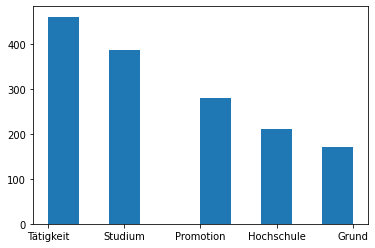

In [209]:
from matplotlib.pyplot import hist

hist(new_df[0:5].Word, weights=new_df[0:5].Frequency)

In [210]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data['clean_text_w_lemma'])):
    tokens = nltk.word_tokenize(data['clean_text_w_lemma'][i]) #without nltk.word_tokenize, it gives character level DF
    for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}

In [211]:
#way of thresholding 

In [212]:
DF.keys()

dict_keys(['Hinweis', 'Datenschutz', 'Link', 'Hochschule', 'Dezember', 'Promotion', 'Interesse', 'Promotionsbedingung', 'Promovierenden', 'Doppelbefragung', 'Fragebogen', 'Antwort', 'Zweck', 'Qualitätssicherung', 'Evaluation', 'Bereich', 'Doktorandenausbildung', 'Einverständnis', 'Anfang', 'Doktorand', 'Zwischenzeit', 'Bitte', 'Grund', 'Promotionsvorhaben', 'Unterbrechung', 'Fragestellung', 'Fortschritt', 'Fach', 'Umfeld', 'Anderes', 'Lösung', 'Problem', 'Ansehen', 'Berufschance', 'Arbeitsmarkt', 'Sonstige', 'Arbeit', 'Quartal', 'Zulassungsantrag', 'Standort', 'Forschungsbedingung', 'Betreuers', 'Betreuerin', 'Rufs', 'Serviceangebot', 'Promovierende', 'Promotionsverfahren', 'Ausland', 'Abschluss', 'In', 'Fachhochschule', 'Wissenschaft', 'Verwaltungshochschule', 'Aussage', 'Arbeitsvertrag', 'Teil', 'FH', 'Professor', 'Prüfer', 'Gutachter', 'Betreuer', 'Kooperationsvertrag', 'Universität', 'Betreuungsvereinbarung', 'Universitäts', 'Bezug', 'Promotionszeit', 'Dauer', 'Vorgabe', 'Antrag', 

In [213]:
len(DF) #Total Unique words

3066

In [214]:
len(data["Documents"])

19

In [215]:
for word,freq in DF.items():
    print(word,len(freq))

Hinweis 2
Datenschutz 4
Link 1
Hochschule 18
Dezember 2
Promotion 14
Interesse 12
Promotionsbedingung 1
Promovierenden 3
Doppelbefragung 1
Fragebogen 3
Antwort 3
Zweck 4
Qualitätssicherung 1
Evaluation 3
Bereich 8
Doktorandenausbildung 2
Einverständnis 2
Anfang 4
Doktorand 5
Zwischenzeit 1
Bitte 17
Grund 17
Promotionsvorhaben 2
Unterbrechung 2
Fragestellung 4
Fortschritt 2
Fach 10
Umfeld 6
Anderes 3
Lösung 4
Problem 14
Ansehen 6
Berufschance 6
Arbeitsmarkt 3
Sonstige 11
Arbeit 16
Quartal 1
Zulassungsantrag 1
Standort 6
Forschungsbedingung 1
Betreuers 2
Betreuerin 4
Rufs 2
Serviceangebot 1
Promovierende 2
Promotionsverfahren 1
Ausland 15
Abschluss 16
In 1
Fachhochschule 9
Wissenschaft 13
Verwaltungshochschule 1
Aussage 16
Arbeitsvertrag 4
Teil 9
FH 2
Professor 6
Prüfer 1
Gutachter 7
Betreuer 3
Kooperationsvertrag 1
Universität 12
Betreuungsvereinbarung 2
Universitäts 2
Bezug 10
Promotionszeit 1
Dauer 9
Vorgabe 2
Antrag 11
Annahme 1
Fakultät 2
Zulassung 5
Promotionsprüfungsverfahren 1
Ve

Konzentration 1
Kreis 2
Betreuungsangebot 1
Fachschaften 1
Selbstverwaltung 3
Vertretung 1
AStA 1
Selbstverwaltungsgremium 1
Senat 1
Konzil 1
Studentenvereinigung 1
Hochschulgruppe 1
Studentenverbindung 1
Studentensport 1
Sportgruppe 1
Theater 3
Orchestergruppe 1
Ausdruck 1
Auseinandersetzung 1
Online 3
Flugblatt 1
Aufrufe 1
Blogs 1
Plattform 3
Boykott 1
Einflussnahme 1
Gremium 4
Institutsbesetzung 1
Demonstration 1
Kundgebung 1
Element 1
Modularisierung 1
Qualitätskontrolle 1
Kreditpunktesystem 1
Bestandteil 4
Akkreditierung 1
Finanzierungshilfe 1
Auslandsstudium 1
Unbekannte 1
Nützliche 1
Allgemeinheit 1
Schulbereich 1
Hochschulbereich 2
Erwerbscharakter 1
Rundfunk 6
Gewerkschaft 2
Kanzlei 4
Ähnliche 1
Unternehmer 1
Gewerbe 3
Dienstleistung 6
Arbeitsprojekt 1
Abschlussexamen 1
Belastung 8
Kauf 2
Wohnortwechsel 1
Fahrzeit 1
Berufsalternative 1
Einbuße 2
Studienorganisation 1
Mischungen 1
Präsenz 2
Praxisphase 1
Bundesrepublik 1
Große 2
Ganze 2
Geschehen 1
Politik 2
Europapolitik 1
Sys

Zutreffende 1
Begabtenförderungswerk 1
Deutschlandstipendium 2
Aufstiegsstipendium 2
Geldgeber 2
Kommune 2
Geldgebers 2
Stifter 2
Miete 3
Nebenkosten 3
Strom 3
Heizung 3
Wasser 3
Müllabfuhr 2
Ernährung 3
Kleidung 3
Lernmittel 3
Ausgabe 3
Auto 3
Verkehrsmittel 3
Krankenversicherung 3
Pflegeversicherung 3
Arztkosten 3
Telefon 3
Internetkosten 3
Fernsehgebühr 2
Jobben 4
Planungsperspektive 3
Weiterförderung 3
Vorraussetzung 1
Ehepartner 3
Ehepartnerin 2
Vermögen 3
Förderungshöchstdauer 3
Leistungsbescheinigung 3
Altersgrenze 2
Hochschulausbildung 3
Zweitstudium 3
Ergänzungsstudium 3
Zuschuss 3
Hälfte 3
Zuschlag 3
Kranke 3
Nettostundenlohn 2
Aushilfstätigkeit 2
Fabrik 2
Büro 3
Kneipe 2
Praktikums 1
Praktikumsvergütung 1
Nachhilfeunterricht 2
Bestreitung 2
Studentenwohnheim 2
Einzelzimmer 2
Wohngruppe 2
Einzelappartement 2
Mehrzimmer 1
Paar 2
Zweibettzimmer 2
Eigentumswohnung 1
Untermiete 2
Privatleute 1
Wohnsituation 5
Mensa 3
Cafeteria 3
Essen 3
Frühstück 3
Zwischenmahlzeit 3
Vormittag 3


In [216]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [217]:
df_list.sort(key=lambda x:x[1])

In [218]:
df_list

[('Link', 0.05263157894736842),
 ('Promotionsbedingung', 0.05263157894736842),
 ('Doppelbefragung', 0.05263157894736842),
 ('Qualitätssicherung', 0.05263157894736842),
 ('Zwischenzeit', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('Zulassungsantrag', 0.05263157894736842),
 ('Forschungsbedingung', 0.05263157894736842),
 ('Serviceangebot', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('In', 0.05263157894736842),
 ('Verwaltungshochschule', 0.05263157894736842),
 ('Prüfer', 0.05263157894736842),
 ('Kooperationsvertrag', 0.05263157894736842),
 ('Promotionszeit', 0.05263157894736842),
 ('Annahme', 0.05263157894736842),
 ('Promotionsprüfungsverfahren', 0.05263157894736842),
 ('Promotionsprojekt', 0.05263157894736842),
 ('Stakeholdern', 0.05263157894736842),
 ('Richtung', 0.05263157894736842),
 ('Abschlussphase', 0.05263157894736842),
 ('Fächerauswahl', 0.05263157894736842),
 ('Stakeholder', 0.05263157894736842),
 ('Geldgebende', 0.05263157894736842),
 ('

In [219]:
check = [x[1] for x in df_list]

In [220]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(check), orient='index').reset_index()

In [221]:
df_analysis

,index,0
0,0.052632,1680
1,0.105263,543
2,0.157895,292
3,0.210526,151
4,0.263158,100
5,0.315789,83
6,0.368421,45
7,0.421053,45
8,0.473684,29
9,0.526316,17


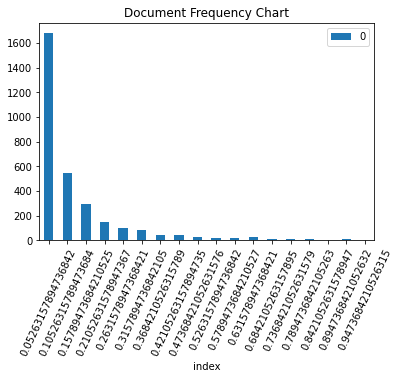

In [222]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [223]:
sample_data_w_lemma[0]

'Hinweis Datenschutz Link Hochschule Dezember Promotion Interesse Promotionsbedingung Promovierenden Doppelbefragung Fragebogen Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis Anfang Dezember Hochschule Doktorand Zwischenzeit Bitte Grund Promotionsvorhaben Grund Promotionsvorhaben Hochschule Unterbrechung Promotion Fragestellung Fortschritt Fach Umfeld Anderes Lösung Problem Ansehen Berufschance Arbeitsmarkt Sonstige Arbeit Promotion Quartal Arbeit Quartal Arbeit Hochschule Promotion Zulassungsantrag Quartal Promotion Hochschule Promotion Promotion Quartal Promotion Hochschule Hochschule Hochschule Promotion Hochschule Standort Forschungsbedingung Fach Betreuers Betreuerin Rufs Hochschule Serviceangebot Promovierende Sonstige Promotionsverfahren Hochschule Ausland Abschluss Hochschule In Ausland Promotionsverfahren Fachhochschule Hochschule Wissenschaft Promotionsverfahren Fachhochschule Hochschule Wissenschaft Verwaltungshochschule A

In [224]:
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(stop_words=stop_words, ngram_range=(1,1), min_df=0.05263) # trying different things

word_count_vector=cv.fit_transform(sample_data_w_lemma) #training  ,  #model.fit

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [225]:
#the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hinweis': 1278,
 'datenschutz': 591,
 'link': 1671,
 'hochschule': 1288,
 'dezember': 610,
 'promotion': 2021,
 'interesse': 1360,
 'promotionsbedingung': 2025,
 'promovierenden': 2053,
 'doppelbefragung': 643,
 'fragebogen': 1025,
 'antwort': 119,
 'zweck': 2965,
 'qualitätssicherung': 2109,
 'evaluation': 822,
 'bereich': 398,
 'doktorandenausbildung': 635,
 'einverständnis': 712,
 'anfang': 76,
 'doktorand': 633,
 'zwischenzeit': 2977,
 'grund': 1192,
 'promotionsvorhaben': 2046,
 'unterbrechung': 2607,
 'fragestellung': 1026,
 'fortschritt': 1019,
 'fach': 842,
 'umfeld': 2585,
 'lösung': 1682,
 'problem': 1993,
 'ansehen': 101,
 'berufschance': 418,
 'arbeitsmarkt': 149,
 'sonstige': 2324,
 'arbeit': 127,
 'quartal': 2113,
 'zulassungsantrag': 2942,
 'standort': 2382,
 'forschungsbedingung': 982,
 'betreuers': 479,
 'betreuerin': 478,
 'rufs': 2193,
 'serviceangebot': 2297,
 'promovierende': 2052,
 'promotionsverfahren': 2045,
 'ausland': 263,
 'abschluss': 16,
 'fachhochschule'

In [226]:
word_count_vector.shape
#We have 19 (rows) documents and 6001 unique words (columns)!
# With stopwords

(19, 3003)

In [227]:
cv.stop_words_ #gives you the stop words that CountVectorizer inferred from your min_df and max_df settings as well as those that were cut off during feature selection (through the use of max_features)

set()

In [228]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [229]:
feature_names=cv.get_feature_names()

/home/pawan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [230]:
feature_names

['abbruch',
 'abendessen',
 'abendgymnasium',
 'abfassen',
 'abfassung',
 'abgabe',
 'abgebrochen',
 'abgelehnter',
 'abgesehen',
 'abitur',
 'ablauf',
 'ablehnung',
 'ablehnungsrisiko',
 'abmeldung',
 'abneigung',
 'abschaffung',
 'abschluss',
 'abschlussarbeit',
 'abschlusses',
 'abschlussexamen',
 'abschlussniveau',
 'abschlussnote',
 'abschlussphase',
 'abschlussprüfung',
 'abschlusszeugnis',
 'abschluß',
 'abschnitt',
 'abschrift',
 'absicht',
 'absolvent',
 'abstandsgebot',
 'abstieg',
 'abstimmung',
 'abteilung',
 'abteilungsleiter',
 'abteilungsleiterin',
 'abwehr',
 'abzahlung',
 'abzug',
 'acknowledgments',
 'administration',
 'adresse',
 'agentur',
 'agrar',
 'agrarwissenschaft',
 'ags',
 'akademiker',
 'akademikerin',
 'akkreditierung',
 'akkreditierungsverfahren',
 'akteur',
 'aktivität',
 'aktualisierung',
 'aktuar',
 'aktuarin',
 'akzeptanz',
 'alkohol',
 'allge',
 'allgemeinbildung',
 'allgemeinheit',
 'allgemeinwohl',
 'alltag',
 'altenpflege',
 'alternative',
 'alters

In [231]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,300)
    
    return (keywords)


In [232]:
result = []
for doc in sample_data_w_lemma:
    df = {}
    df['Text'] = doc
    df['top_keywords'] = get_keywords(tfidf_transformer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,Text,top_keywords
0,Hinweis Datenschutz Link Hochschule Dezember P...,"{'promotion': 0.498, 'betreuer': 0.286, 'hochs..."
1,Information Datenschutz Willige Teilnahme Befr...,"{'kurs': 0.444, 'deutsch': 0.415, 'vorbereitun..."
2,Studium Sommersemester Wintersemester Merkmal ...,"{'masterstudium': 0.609, 'studium': 0.327, 'ma..."
3,Art Hochschule Universität Universität Fachhoc...,"{'fach': 0.3, 'studium': 0.231, 'sprache': 0.1..."
4,Tätigkeit Trainee Beschäftigung Praktikum Refe...,"{'tätigkeit': 0.342, 'weiterbildung': 0.311, '..."
5,Ware Befragung Form Abschluss Promotion Form E...,"{'tätigkeit': 0.392, 'dienst': 0.292, 'rätin':..."
6,Teilnahme Befragung Verwendung Datum Bildungs ...,"{'studium': 0.554, 'bereich': 0.215, 'ausbildu..."
7,Sprache Befragung Information Datennutzung Ein...,"{'kollege': 0.27, 'wissenschaftlerinnen': 0.21..."
8,Teilnahme Befragung Verwendung Datum Ware Befr...,"{'ausland': 0.333, 'tätigkeit': 0.301, 'stelle..."
9,Hauptfach Fach Sommersemester Fach Angabe Filt...,"{'auslandsaufenthalt': 0.342, 'tätigkeit': 0.2..."


In [290]:
final['top_keywords'][0]

{'promotion': 0.498,
 'betreuer': 0.286,
 'hochschule': 0.151,
 'betreuende': 0.147,
 'fakultät': 0.129,
 'vertrag': 0.119,
 'stelle': 0.117,
 'promotionsprogramm': 0.116,
 'thema': 0.114,
 'aussage': 0.111,
 'beratung': 0.109,
 'promovierende': 0.109,
 'sonstige': 0.109,
 'selbstständigkeit': 0.102,
 'promotionsverfahren': 0.102,
 'promotionsprojekt': 0.102,
 'forschungs': 0.098,
 'betreuung': 0.097,
 'person': 0.093,
 'wissenschaft': 0.093,
 'mitgliedschaft': 0.09,
 'entscheidungsprozess': 0.09,
 'verfassen': 0.089,
 'hauptbetreuer': 0.089,
 'bezug': 0.087,
 'bereich': 0.086,
 'unternehmen': 0.082,
 'forschungseinrichtung': 0.08,
 'tätigkeit': 0.079,
 'kulturinstitution': 0.079,
 'karriereentwicklung': 0.079,
 'graduiertenakademie': 0.079,
 'arbeitsvertrag': 0.073,
 'forschungsinstitut': 0.071,
 'kurs': 0.07,
 'inhalt': 0.07,
 'hauptbetreuerin': 0.069,
 'betreuungsvereinbarung': 0.069,
 'beratungs': 0.069,
 'praxis': 0.069,
 'eltern': 0.069,
 'zufriedenheit': 0.068,
 'qualifizierungs

In [234]:
(list(final['top_keywords'][0].keys()))

['promotion',
 'betreuer',
 'hochschule',
 'betreuende',
 'fakultät',
 'vertrag',
 'stelle',
 'promotionsprogramm',
 'thema',
 'aussage',
 'beratung',
 'promovierende',
 'sonstige',
 'selbstständigkeit',
 'promotionsverfahren',
 'promotionsprojekt',
 'forschungs',
 'betreuung',
 'person',
 'wissenschaft',
 'mitgliedschaft',
 'entscheidungsprozess',
 'verfassen',
 'hauptbetreuer',
 'bezug',
 'bereich',
 'unternehmen',
 'forschungseinrichtung',
 'tätigkeit',
 'kulturinstitution',
 'karriereentwicklung',
 'graduiertenakademie',
 'arbeitsvertrag',
 'forschungsinstitut',
 'kurs',
 'inhalt',
 'hauptbetreuerin',
 'betreuungsvereinbarung',
 'beratungs',
 'praxis',
 'eltern',
 'zufriedenheit',
 'qualifizierungsziel',
 'nebenabsprache',
 'fachdisziplin',
 'betreuerin',
 'partner',
 'arbeit',
 'stiftung',
 'programm',
 'mitglied',
 'karriere',
 'entwicklungsbezug',
 'stand',
 'behörde',
 'stakeholdern',
 'promotionsthema',
 'phase',
 'informationsquelle',
 'auswahlverfahren',
 'universität',
 'st

In [235]:
#final.to_csv("Questionnaire_check.csv")

In [236]:
#for uniqueness

In [237]:
# #Calculating Document Frequency

# from collections import defaultdict
# import math

# DF2 = {}
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
#         tokens = nltk.word_tokenize(elem) #without nltk.word_tokenize, it gives character level DF
#         for w in tokens:
#             try:
#                 DF2[w].add(i)
#             except:
#                 DF2[w] = {i}

In [238]:
# DF2

In [239]:
# len(DF2)

In [240]:
# for word,freq in DF2.items():
#     print(word,len(freq))

In [241]:
# df_list1=[]
# for word,freq in DF2.items():
#     df_list1.append(tuple((word,len(freq)/19)))

In [242]:
# df_list1

In [243]:
# for uniquenees we can take the amount(count/Frequency) of documents that a keyword occurs in and then dividing it by the total amount of documents.(Document frequency)

# something that comes in 19 out of 19 questionnaire, we can be sure that it is not unique and something that comes in 1 out of 19 it’s very unique.

# we can define a threshold on document frquency and based on that can define the uniqueness/decisiveness of keyword
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
        

In [244]:
type(final['top_keywords'])

pandas.core.series.Series

In [245]:
final['Ground_Truth']= data['Ground_Truth'] 

In [246]:
final

,Text,top_keywords,Ground_Truth
0,Hinweis Datenschutz Link Hochschule Dezember P...,"{'promotion': 0.498, 'betreuer': 0.286, 'hochs...","wissenschaftssystem, betreuung, wissenschaft..."
1,Information Datenschutz Willige Teilnahme Befr...,"{'kurs': 0.444, 'deutsch': 0.415, 'vorbereitun...","integration, geflüchtete, studienkolleg, mi..."
2,Studium Sommersemester Wintersemester Merkmal ...,"{'masterstudium': 0.609, 'studium': 0.327, 'ma...","beruflicher verbleib von exmatrikulierten, st..."
3,Art Hochschule Universität Universität Fachhoc...,"{'fach': 0.3, 'studium': 0.231, 'sprache': 0.1...","evaluation, qualifikation, effizienz, studi..."
4,Tätigkeit Trainee Beschäftigung Praktikum Refe...,"{'tätigkeit': 0.342, 'weiterbildung': 0.311, '...",hochschulforschung
5,Ware Befragung Form Abschluss Promotion Form E...,"{'tätigkeit': 0.392, 'dienst': 0.292, 'rätin':...","promotion, hochschulforschung"
6,Teilnahme Befragung Verwendung Datum Bildungs ...,"{'studium': 0.554, 'bereich': 0.215, 'ausbildu...","studienberechtigte, hochschulforschung"
7,Sprache Befragung Information Datennutzung Ein...,"{'kollege': 0.27, 'wissenschaftlerinnen': 0.21...",hochschulforschung
8,Teilnahme Befragung Verwendung Datum Ware Befr...,"{'ausland': 0.333, 'tätigkeit': 0.301, 'stelle...","promotion, hochschulforschung"
9,Hauptfach Fach Sommersemester Fach Angabe Filt...,"{'auslandsaufenthalt': 0.342, 'tätigkeit': 0.2...",hochschulforschung


In [247]:
# final.to_csv("keywords_After_POS.csv")

In [248]:
final['top_keywords'][0]

{'promotion': 0.498,
 'betreuer': 0.286,
 'hochschule': 0.151,
 'betreuende': 0.147,
 'fakultät': 0.129,
 'vertrag': 0.119,
 'stelle': 0.117,
 'promotionsprogramm': 0.116,
 'thema': 0.114,
 'aussage': 0.111,
 'beratung': 0.109,
 'promovierende': 0.109,
 'sonstige': 0.109,
 'selbstständigkeit': 0.102,
 'promotionsverfahren': 0.102,
 'promotionsprojekt': 0.102,
 'forschungs': 0.098,
 'betreuung': 0.097,
 'person': 0.093,
 'wissenschaft': 0.093,
 'mitgliedschaft': 0.09,
 'entscheidungsprozess': 0.09,
 'verfassen': 0.089,
 'hauptbetreuer': 0.089,
 'bezug': 0.087,
 'bereich': 0.086,
 'unternehmen': 0.082,
 'forschungseinrichtung': 0.08,
 'tätigkeit': 0.079,
 'kulturinstitution': 0.079,
 'karriereentwicklung': 0.079,
 'graduiertenakademie': 0.079,
 'arbeitsvertrag': 0.073,
 'forschungsinstitut': 0.071,
 'kurs': 0.07,
 'inhalt': 0.07,
 'hauptbetreuerin': 0.069,
 'betreuungsvereinbarung': 0.069,
 'beratungs': 0.069,
 'praxis': 0.069,
 'eltern': 0.069,
 'zufriedenheit': 0.068,
 'qualifizierungs

In [252]:
predicted=[]
chunk_size = 1 #chunk_size = 20, coz max ground truth size is 20
for i in range(len(final['top_keywords'])):
    predicted.append([])           #use for nested list
    for j in range(1,int(200/chunk_size)+1):
        predicted[i].append(list(final['top_keywords'][i].keys())[0:j*chunk_size])

In [253]:
len(predicted[0][-1])

200

In [254]:
len(predicted[0])

200

In [255]:
check = list(final['Ground_Truth'])

In [256]:
ground_truth =[]
for i in range(len(check)):
    ground_truth.append([check[i]])

In [257]:
ground_truth

[['wissenschaftssystem,  betreuung,  wissenschaftliche karriere,  promotionsformen,  promotionsmotive,  vereinbarkeit von familie und beruf,  monetäre erträge,  nicht-monetäre erträge,  wissenschaftlicher nachwuchs,  promotionsabbruch,  promovierende,  promotion,  strukturierte promotion,  persönlichkeit,  finanzierung,  mobilität,  gesundheit,  erwerbsverläufe,  arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft,  promovierte'],
 ['integration,  geflüchtete,  studienkolleg,  migration,  studienvorbereitung'],
 ['beruflicher verbleib von exmatrikulierten,  studiensituation,  studienabbruch,  masterstudium,  abbruchursachen'],
 ['evaluation,  qualifikation,  effizienz,  studiensituation,  zeitreihen,  studierendenbefragung,  hochschulforschung'],
 ['hochschulforschung'],
 ['promotion,  hochschulforschung'],
 ['studienberechtigte,  hochschulforschung'],
 ['hochschulforschung'],
 ['promotion,  hochschulforschung'],
 ['hochschulforschung'],
 ['integration,  geflüchtete,  studienko

In [258]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [259]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [260]:
len(ground_truth[12])

15

In [261]:
len(ground_truth)

19

In [265]:
len(list(final['top_keywords']))

19

In [266]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,groundtruth):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(groundtruth)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [267]:
ground_truth[4]

['hochschulforschung']

In [268]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], ground_truth[i]))

In [269]:
len(eval_values[0])

200

In [270]:
eval_values

[[(1.0, 0.05, 0.09523809523809523),
  (0.5, 0.05, 0.09090909090909091),
  (0.3333333333333333, 0.05, 0.08695652173913045),
  (0.25, 0.05, 0.08333333333333334),
  (0.2, 0.05, 0.08000000000000002),
  (0.16666666666666666, 0.05, 0.07692307692307691),
  (0.14285714285714285, 0.05, 0.07407407407407408),
  (0.125, 0.05, 0.07142857142857144),
  (0.1111111111111111, 0.05, 0.06896551724137932),
  (0.1, 0.05, 0.06666666666666667),
  (0.09090909090909091, 0.05, 0.06451612903225806),
  (0.16666666666666666, 0.1, 0.125),
  (0.15384615384615385, 0.1, 0.12121212121212123),
  (0.14285714285714285, 0.1, 0.11764705882352941),
  (0.13333333333333333, 0.1, 0.1142857142857143),
  (0.125, 0.1, 0.11111111111111112),
  (0.11764705882352941, 0.1, 0.1081081081081081),
  (0.16666666666666666, 0.15, 0.15789473684210525),
  (0.15789473684210525, 0.15, 0.15384615384615385),
  (0.15, 0.15, 0.15),
  (0.14285714285714285, 0.15, 0.14634146341463414),
  (0.13636363636363635, 0.15, 0.14285714285714282),
  (0.130434782608

In [271]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [272]:
len(precison_values[0])

200

In [273]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [274]:
recall_values[0]

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.2,

In [275]:
f1_score = []
for i in range(len(eval_values)):
    f1_score.append([])
    for a_tuple in eval_values[i]:
        f1_score[i].append(a_tuple[2])

In [276]:
f1_score[0]

[0.09523809523809523,
 0.09090909090909091,
 0.08695652173913045,
 0.08333333333333334,
 0.08000000000000002,
 0.07692307692307691,
 0.07407407407407408,
 0.07142857142857144,
 0.06896551724137932,
 0.06666666666666667,
 0.06451612903225806,
 0.125,
 0.12121212121212123,
 0.11764705882352941,
 0.1142857142857143,
 0.11111111111111112,
 0.1081081081081081,
 0.15789473684210525,
 0.15384615384615385,
 0.15,
 0.14634146341463414,
 0.14285714285714282,
 0.13953488372093023,
 0.13636363636363635,
 0.1333333333333333,
 0.13043478260869565,
 0.12765957446808512,
 0.125,
 0.12244897959183673,
 0.12,
 0.11764705882352941,
 0.11538461538461538,
 0.11320754716981132,
 0.11111111111111112,
 0.10909090909090909,
 0.10714285714285714,
 0.10526315789473685,
 0.10344827586206896,
 0.1016949152542373,
 0.1,
 0.09836065573770492,
 0.09677419354838708,
 0.09523809523809525,
 0.09374999999999999,
 0.09230769230769231,
 0.09090909090909091,
 0.08955223880597013,
 0.08823529411764706,
 0.08695652173913043,


In [316]:
ground_truth[3]

['evaluation',
 'qualifikation',
 'effizienz',
 'studiensituation',
 'zeitreihen',
 'studierendenbefragung',
 'hochschulforschung']

Graph for document 0


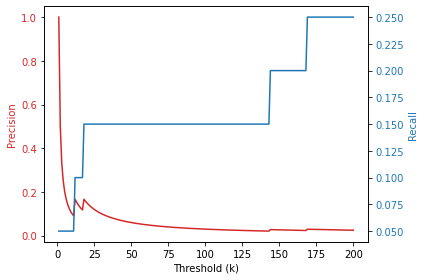

Graph for document 1


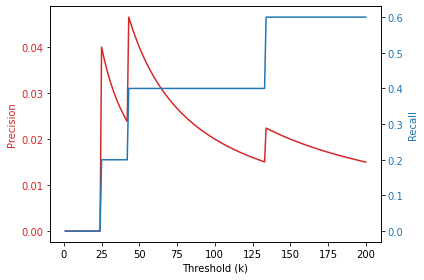

Graph for document 2


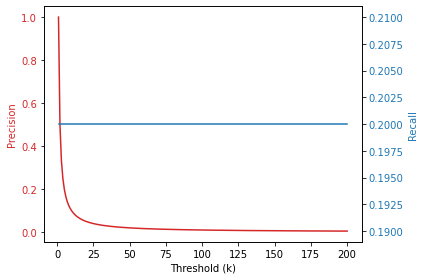

Graph for document 3


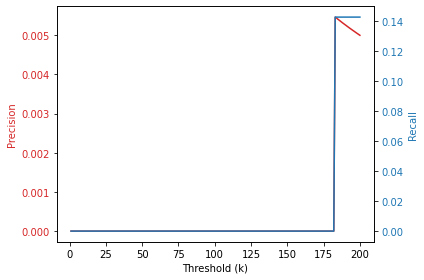

Graph for document 4


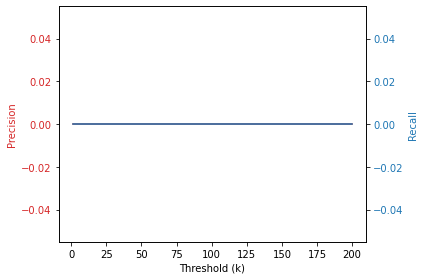

Graph for document 5


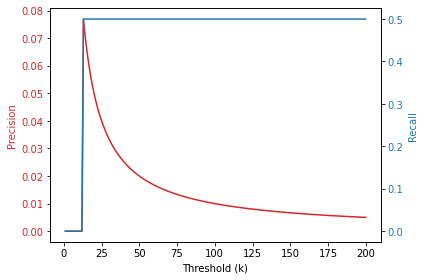

Graph for document 6


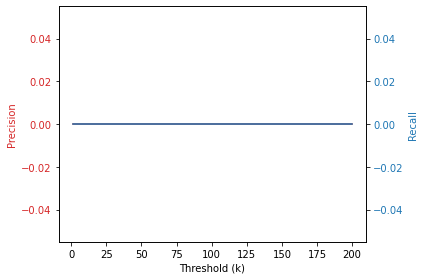

Graph for document 7


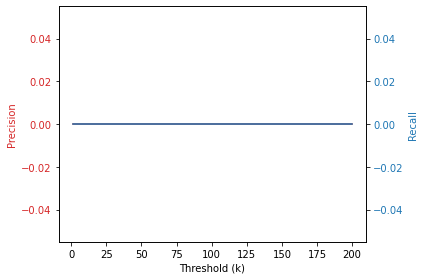

Graph for document 8


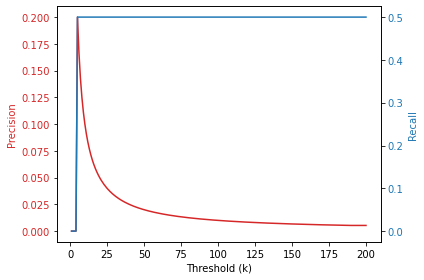

Graph for document 9


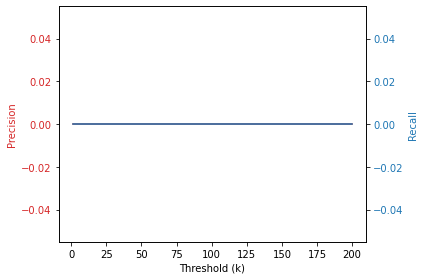

Graph for document 10


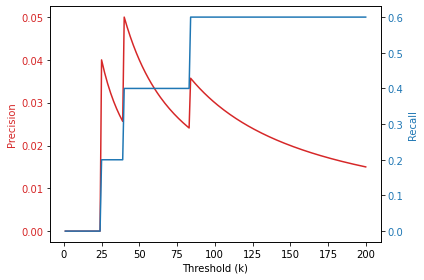

Graph for document 11


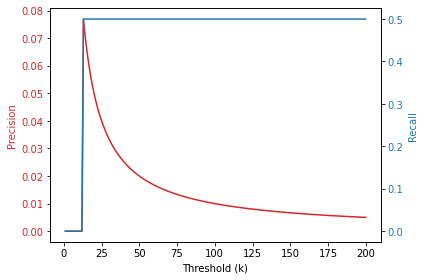

Graph for document 12


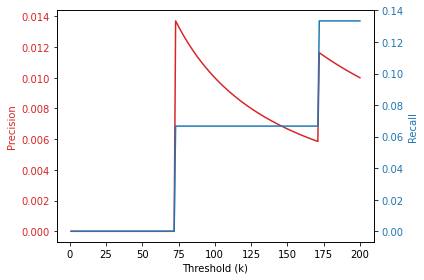

Graph for document 13


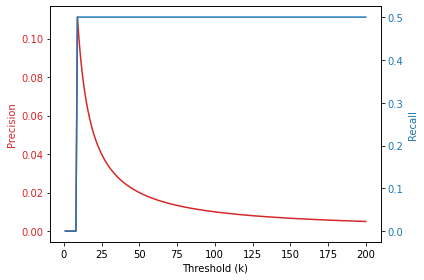

Graph for document 14


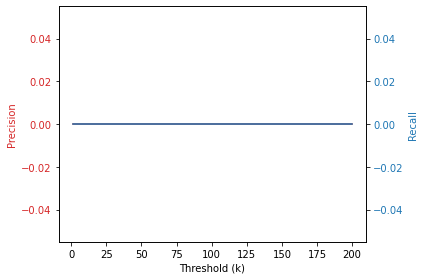

Graph for document 15


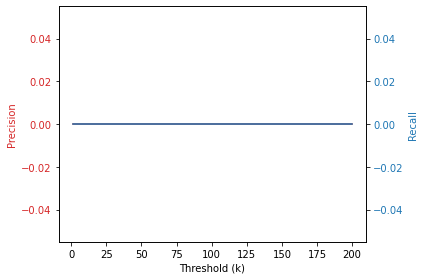

Graph for document 16


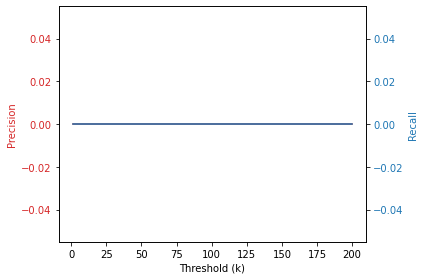

Graph for document 17


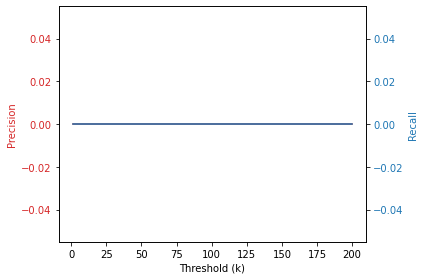

Graph for document 18


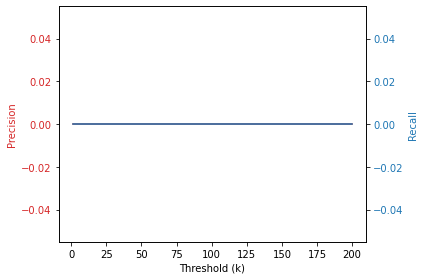

In [278]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,201)]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

 within the top 200 keywords , this scenario(considering only Noun) capture the keyword 'studiensituation', that is why we see the different trend in the graph for few documents compared to Noun+adjectives, we can also say that in our corpus(for that document) we have less number of adjectives.

In [355]:
index_check = list(final['top_keywords'][13].keys())

In [356]:
list(set(index_check).intersection(ground_truth[13]))

['promotion']

In [333]:
ground_truth[2]

['beruflicher verbleib von exmatrikulierten',
 'studiensituation',
 'studienabbruch',
 'masterstudium',
 'abbruchursachen']

In [279]:
list(final['top_keywords'][0].values())

[0.498,
 0.286,
 0.151,
 0.147,
 0.129,
 0.119,
 0.117,
 0.116,
 0.114,
 0.111,
 0.109,
 0.109,
 0.109,
 0.102,
 0.102,
 0.102,
 0.098,
 0.097,
 0.093,
 0.093,
 0.09,
 0.09,
 0.089,
 0.089,
 0.087,
 0.086,
 0.082,
 0.08,
 0.079,
 0.079,
 0.079,
 0.079,
 0.073,
 0.071,
 0.07,
 0.07,
 0.069,
 0.069,
 0.069,
 0.069,
 0.069,
 0.068,
 0.068,
 0.068,
 0.068,
 0.065,
 0.064,
 0.064,
 0.06,
 0.06,
 0.06,
 0.06,
 0.059,
 0.057,
 0.057,
 0.056,
 0.056,
 0.056,
 0.056,
 0.056,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.053,
 0.052,
 0.051,
 0.05,
 0.05,
 0.049,
 0.049,
 0.049,
 0.049,
 0.049,
 0.048,
 0.045,
 0.045,
 0.045,
 0.045,
 0.045,
 0.045,
 0.045,
 0.044,
 0.044,
 0.044,
 0.043,
 0.042,
 0.042,
 0.042,
 0.041,
 0.041,
 0.04,
 0.04,
 0.04,
 0.039,
 0.039,
 0.037,
 0.037,
 0.037,
 0.036,
 0.036,
 0.036,
 0.035,
 0.035,
 0.035,
 0.035,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.034,
 0.033,
 0.033,
 0.033,
 0.033,
 0.033,
 0.033,
 0.033,
 0.032,
 0.031

Recall Score for Documents 0


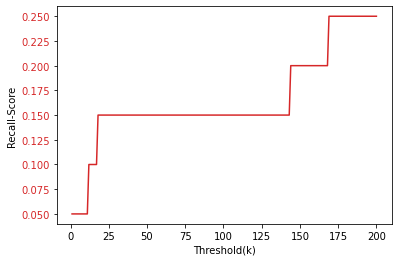

Recall Score for Documents 1


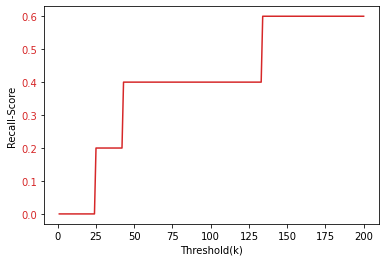

Recall Score for Documents 2


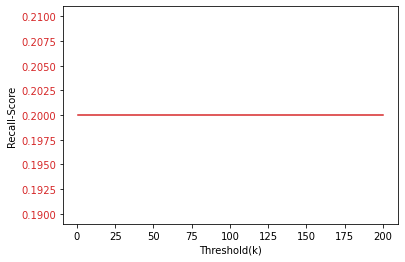

Recall Score for Documents 3


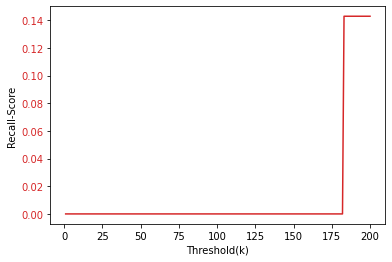

Recall Score for Documents 4


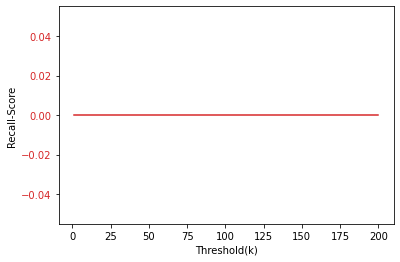

Recall Score for Documents 5


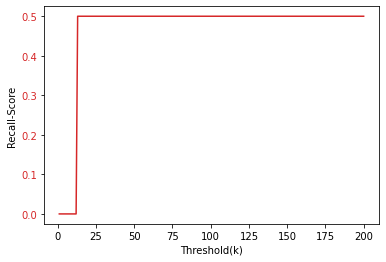

Recall Score for Documents 6


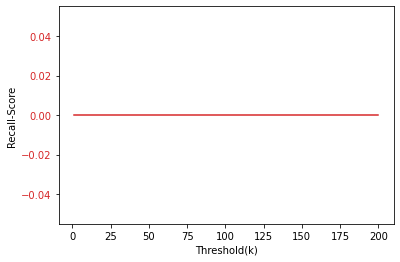

Recall Score for Documents 7


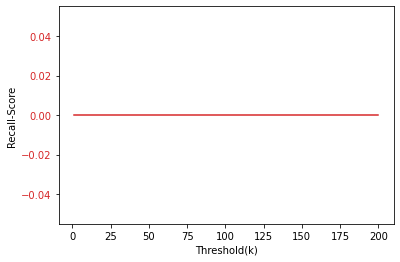

Recall Score for Documents 8


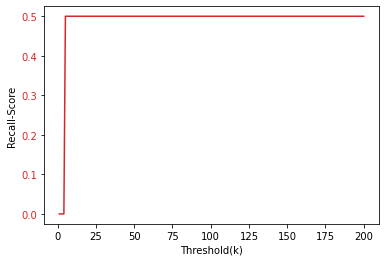

Recall Score for Documents 9


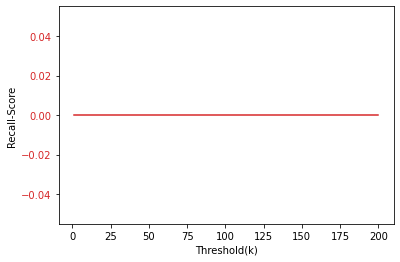

Recall Score for Documents 10


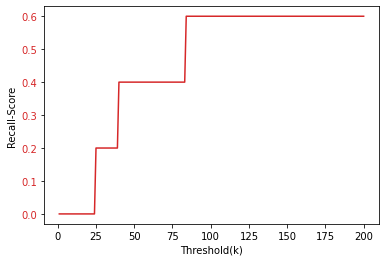

Recall Score for Documents 11


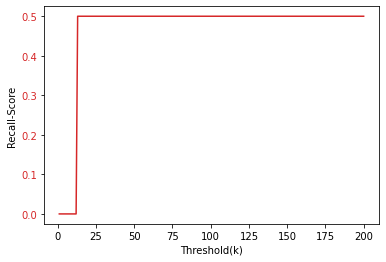

Recall Score for Documents 12


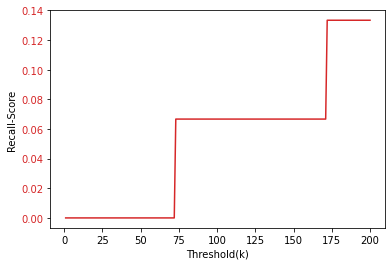

Recall Score for Documents 13


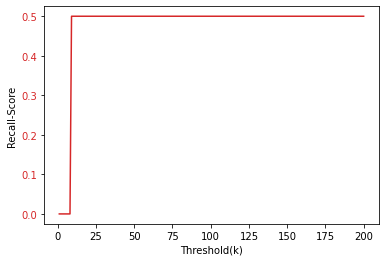

Recall Score for Documents 14


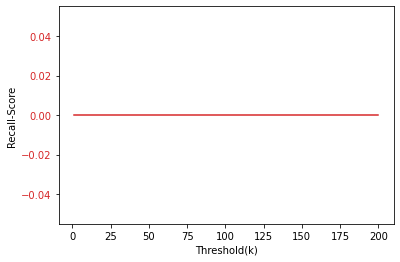

Recall Score for Documents 15


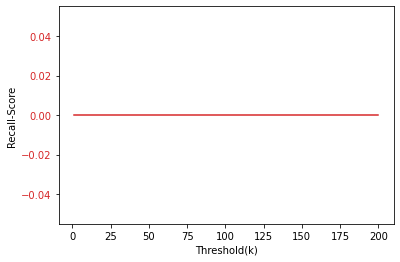

Recall Score for Documents 16


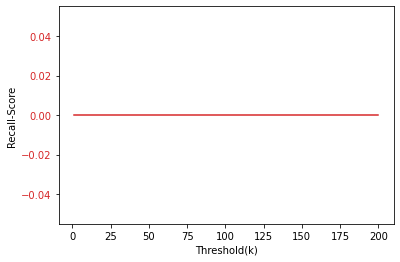

Recall Score for Documents 17


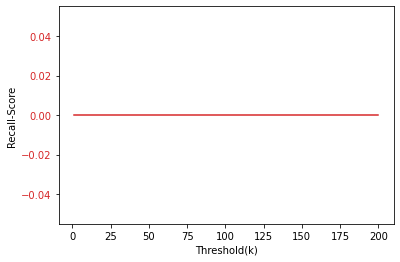

Recall Score for Documents 18


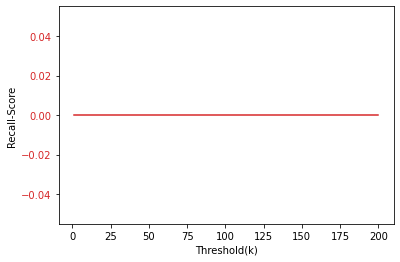

In [280]:
import matplotlib.pyplot as plt

for i in range(len(recall_values)):
    print("Recall Score for Documents " + str(i))
    t = [x for x in range(1,201)]
    data = recall_values[i]
#     fig, ax1 = plt.subplots()

    color = 'tab:red'
    plt.xlabel("Threshold(k)")
    plt.ylabel("Recall-Score")
    plt.plot(t, data, color=color)
    plt.tick_params(axis='y', labelcolor=color)
    plt.show()

In [281]:
best_recall = []
for i in range(len(recall_values)):
    best_recall.append(recall_values[i].index(max(recall_values[i])))

In [282]:
best_recall # will give us index of best recall_values for each docuemnts, for example: for document 0, at index 168 we have the best recall value(check below for that particular value)

[168, 133, 0, 182, 0, 12, 0, 0, 4, 0, 83, 12, 171, 8, 0, 0, 0, 0, 0]

In [283]:
best_recall_indices_element = []

for i in range(len(best_recall)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall[i]])

In [284]:
best_recall_indices_element

[0.25,
 0.6,
 0.2,
 0.14285714285714285,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.0,
 0.6,
 0.5,
 0.13333333333333333,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [285]:
recall_values[0][168] # check value for the above indices

0.25

In [286]:
list(final['top_keywords'][1].values())[133]

0.018

In [287]:
Keywords_filter = []
for i in range(len(final2['top_keywords'])):
    Keywords_filter.append([]) 
    for key, value in list(final2['top_keywords'][i].items()):
        print(key)
#         if value >= 0.018:
#             Keywords_filter[i].append(key)
#             Keywords_filter[i].append(value)            

NameError: name 'final2' is not defined

In [ ]:
len(Keywords_filter[0])

In [ ]:
min(recall_tf_idf)

In [ ]:
np.mean(recall_tf_idf)

In [ ]:
Keywords_filter = []
for key, value in tuple_values:
    if value >= np.mean(recall_tf_idf):
        Keywords_filter.append(key)
        
#         Keywords_filter.append(value)
        

In [ ]:
Keywords_filter

In [ ]:
# new_list=[]
# for i in range(len(final)):
#     new_list.append([])
#     for elem in list((final['top_keywords'])[i].keys()):
#         print(elem)                                 # will print 3800 words(200*19)

In [ ]:
#mapping candidate keywords with thesaurus 
thesaurus_data = pd.read_csv("Thesaurus.csv")

In [ ]:
thesaurus_data

In [ ]:
thesaurus_list=thesaurus_data.values.tolist()

In [ ]:
thesaurus_list

In [ ]:
#lowercase thesaurus words
new_thesaurus_list = []
for sublist in thesaurus_list:
    new_sublist = []
    for item in sublist:
        new_sublist.append(item.lower())
    new_thesaurus_list.append(new_sublist) 

In [ ]:
new_thesaurus_list

In [ ]:
#mapping keyword from tfidf with thesaurus 

new_list=[]
for i in range(len(final)):
#     print(i,flush=True)
    new_list.append([])
    for elem in list((final['top_keywords'])[i].keys()):
        temp = [tuple((index1,index2))for index1,value1 in enumerate(new_thesaurus_list) for index2,value2 in enumerate(value1) if value2==elem]
        if (len(temp))!=0:
            for elem1 in temp:
                if elem1[1]==0:
                    if new_thesaurus_list[elem1[0]][1] == '9999':
#                         print("a",i)
                        new_list[i].append(elem)
                    else:
                        new_list[i].append(tuple((elem,new_thesaurus_list[elem1[0]][1])))
                        
                elif elem1[1]==1:
                    new_list[i].append(elem)
                    

In [ ]:
new_list[18]

In [ ]:
final['Keywords_after_mapping'] = new_list

In [ ]:
final

In [ ]:
final['top_keywords'][0]

In [ ]:
len(final['top_keywords'][0])

In [ ]:
final['Keywords_after_mapping'][0]

In [ ]:
len(final['Keywords_after_mapping'][0])

In [ ]:
#final.to_csv("Questionnaire_check.csv")